# Simple Linear Regression

### The goal is to create a model that predicts delivery time using sorting time.

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [2]:
#loading data
delivery_df=pd.read_csv('delivery_time.csv')
delivery_df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


*The target value is Delivery time(Y) and Independent variable is Sorting Time(X).*

### EDA

In [3]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
delivery_df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [5]:
delivery_df.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

<font color = blue> There are no null values in the dataset </font >

In [6]:
sns.set(style='white')

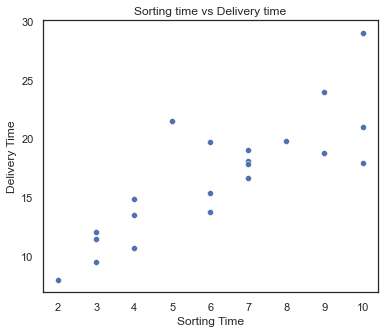

In [7]:
plt.figure(figsize=(6,5))
sns.scatterplot(data=delivery_df,x='Sorting Time',y='Delivery Time')
plt.title('Sorting time vs Delivery time');


C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


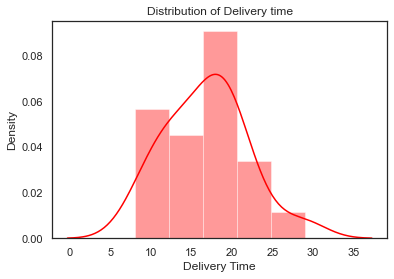

In [8]:
sns.distplot(delivery_df['Delivery Time'],color='red')
plt.title('Distribution of Delivery time');

C:\Users\91775\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


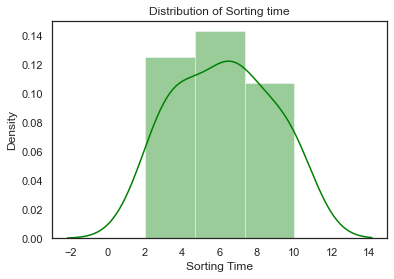

In [9]:
sns.distplot(delivery_df['Sorting Time'],color='Green')
plt.title("Distribution of Sorting time");

In [10]:
delivery_df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


*There is a positive corelation between the two variables.*

Text(0.5, 1.0, 'Regression line')

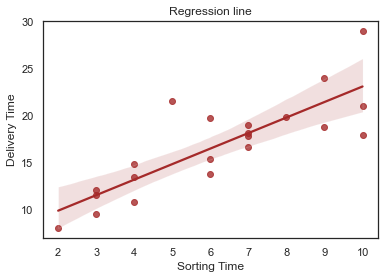

In [11]:
sns.regplot(x='Sorting Time',y='Delivery Time',data=delivery_df,color='brown');
plt.title("Regression line")

In [12]:
#splitting the dataset 
X= np.array(delivery_df['Sorting Time']).reshape(-1, 1)
Y= np.array(delivery_df['Delivery Time']).reshape(-1, 1)

## <font color=salmon> Model Building </font>

In [13]:
model= LinearRegression()

In [14]:
#training the model
model.fit(X,Y)

LinearRegression()

In [15]:
#model evaluation
predicted=model.predict(X)


In [16]:
#calculating Mean absolute error
from sklearn.metrics import mean_absolute_error
MAE=metrics.mean_absolute_error(Y,predicted)
print("Mean absolute error is {}".format(MAE))

Mean absolute error is 2.0857409551882657


In [17]:
from sklearn.metrics import r2_score
Rsquare= r2_score(Y,predicted)
Rsquare

0.6822714748417231

**<font color=olive>Using statsmodel for calculations</font>**

In [18]:
delivery_df.rename({"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"},axis=1,inplace=True)
delivery_df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [19]:
import statsmodels.formula.api as smf
model1=smf.ols('Delivery_time~Sorting_time',data=delivery_df).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:          Delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           3.98e-06
Time:                        09:55:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823   

In [20]:
print("The intercept value is 6.5827\nThe slope is 1.6490 \nThe R-squared value is 0.682\nThe adusted R-squared values is 0.666")

The intercept value is 6.5827
The slope is 1.6490 
The R-squared value is 0.682
The adusted R-squared values is 0.666


In [21]:
#t and p values
model1.tvalues,model1.pvalues

(Intercept       3.823349
 Sorting_time    6.387447
 dtype: float64,
 Intercept       0.001147
 Sorting_time    0.000004
 dtype: float64)

**Predictions**

In [22]:
new_data=pd.Series([6,10,8])
dpred=pd.DataFrame(new_data,columns=['Sorting time'])
dpred

,Sorting time
0,6
1,10
2,8


In [23]:
model.predict(dpred)

array([[16.47685335],
       [23.07293294],
       [19.77489315]])

* <font color=brown> The model is efficint with 68% accuray and has a mean absolute error of 2. </font>

###  Transformation

In [24]:
delivery_df.head()

,Delivery_time,Sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [26]:
# Transforming variables for accuracy
model2 = smf.ols('Delivery_time~np.log(Sorting_time)',data=delivery_df).fit()

In [27]:
model2.params

Intercept               1.159684
np.log(Sorting_time)    9.043413
dtype: float64

In [28]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     43.39
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           2.64e-06
Time:                        09:55:54   Log-Likelihood:                -50.912
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.1597      2.455      0.472      0.642      -3.978       6.297
np.log(Sorting_time)     9.0434      1.373      6.587      0.000       6.170      11.917
==============================================================================
Omnibus:                        5.552   Durbin-Watson:                   1.427
Prob(Omnibus):                  0.062   Jarque-Bera (JB):                3.481
Skew:                           0.946   Prob(JB):                        0.175
Kurtosis:                       3.628   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
print(model2.conf_int(0.01)) # 99% confidence level

                             0          1
Intercept            -5.862666   8.182033
np.log(Sorting_time)  5.115458  12.971369


In [30]:
pred_on_model2 = model2.predict(pd.DataFrame(delivery_df['Sorting_time']))

In [31]:
pred_on_model2.corr(delivery_df['Sorting_time'])

0.9774469985241836

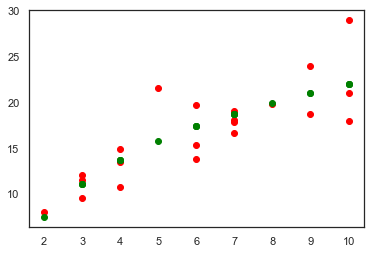

In [32]:
plt.scatter(x=delivery_df['Sorting_time'],y=delivery_df['Delivery_time'],color='red');
plt.scatter(x=delivery_df['Sorting_time'],y=pred_on_model2,color='green');

In [39]:
model3 = smf.ols('np.log(Delivery_time)~Sorting_time',data=delivery_df).fit()

In [40]:
model3.params

Intercept       2.121372
Sorting_time    0.105552
dtype: float64

In [41]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.711
Model:                               OLS   Adj. R-squared:                  0.696
Method:                    Least Squares   F-statistic:                     46.73
Date:                   Sat, 08 Jan 2022   Prob (F-statistic):           1.59e-06
Time:                           10:23:27   Log-Likelihood:                 7.7920
No. Observations:                     21   AIC:                            -11.58
Df Residuals:                         19   BIC:                            -9.495
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        2.1214      0.103     20.601      0.000       1.906       2.337
Sorting_time     0.1056      0.015      6.836      0.000       0.073       0.138
==============================================================================
Omnibus:                        1.238   Durbin-Watson:                   1.325
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.544
Skew:                           0.393   Prob(JB):                        0.762
Kurtosis:                       3.067   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(model3.conf_int(0.05))

                     0         1
Intercept     1.905848  2.336896
Sorting_time  0.073235  0.137869


In [53]:
log_pred=model3.predict(delivery_df.iloc[:,1])
pred_on_model3=np.exp(log_pred)

<AxesSubplot:xlabel='Sorting_time'>

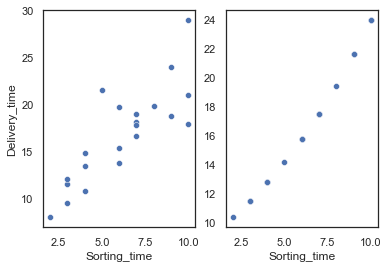

In [54]:
plt.subplot(1,2,1)
sns.scatterplot(x=delivery_df['Sorting_time'],y=delivery_df['Delivery_time'])
plt.subplot(1,2,2)
sns.scatterplot(x=delivery_df['Sorting_time'],y=pred_on_model3)

Text(0, 0.5, 'Actual')

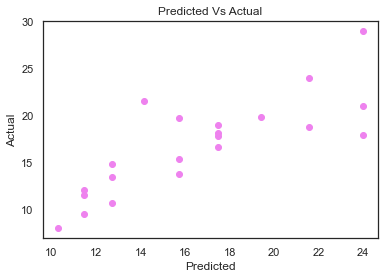

In [59]:
# Predicted vs actual values
plt.title("Predicted Vs Actual")
plt.scatter(x=pred_on_model3,y=delivery_df['Delivery_time'],color='violet');plt.xlabel("Predicted");plt.ylabel("Actual")

### Using square

In [90]:
#Quadratic model
delivery_df['Sorting_time_sq']=delivery_df.Sorting_time*delivery_df.Sorting_time

In [91]:
model4=smf.ols('Delivery_time~Sorting_time_sq',data=delivery_df).fit()

In [92]:
model4.params

Intercept          11.237205
Sorting_time_sq     0.124870
dtype: float64

In [93]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.630
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     32.39
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           1.74e-05
Time:                        11:11:30   Log-Likelihood:                -52.948
No. Observations:                  21   AIC:                             109.9
Df Residuals:                      19   BIC:                             112.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          11.2372      1.196      9.399      0.000       8.735      13.740
Sorting_time_sq     0.1249      0.022      5.691      0.000       0.079       0.171
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                0.772
Skew:                           0.469   Prob(JB):                        0.680
Kurtosis:                       3.050   Cond. No.                         94.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using squareroot

In [94]:
delivery_df['Sorting_time_sqrt']=np.sqrt(delivery_df['Sorting_time'])

In [95]:
#dropped the squared column
delivery_df.head()

,Delivery_time,Sorting_time,Sorting_time_sqrt,Sorting_time_sq
0,21.00,10,3.162278,100
1,13.50,4,2.000000,16
2,19.75,6,2.449490,36
3,24.00,9,3.000000,81
4,29.00,10,3.162278,100


In [98]:
model5=smf.ols('Delivery_time~Sorting_time_sqrt',data=delivery_df).fit()

In [99]:
model5.params

Intercept           -2.518837
Sorting_time_sqrt    7.936591
dtype: float64

In [102]:
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_time   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     43.46
Date:                Sat, 08 Jan 2022   Prob (F-statistic):           2.61e-06
Time:                        11:13:35   Log-Likelihood:                -50.900
No. Observations:                  21   AIC:                             105.8
Df Residuals:                      19   BIC:                             107.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -2.5188      2.995     -0.841      0.411      -8.788       3.751
Sorting_time_sqrt     7.9366      1.204      6.592      0.000       5.417      10.456
==============================================================================
Omnibus:                        4.658   Durbin-Watson:                   1.318
Prob(Omnibus):                  0.097   Jarque-Bera (JB):                2.824
Skew:                           0.865   Prob(JB):                        0.244
Kurtosis:                       3.483   Cond. No.                         13.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
pred_on_model5=model5.predict(delivery_df['Sorting_time_sqrt'])

In [108]:
pred_on_model5.corr(delivery_df['Delivery_time'])

0.8341500030755062

Text(0, 0.5, 'Actual')

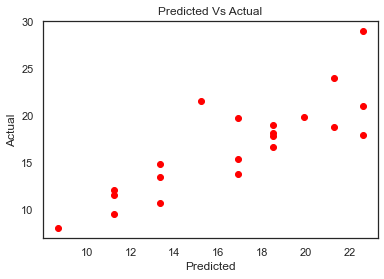

In [110]:
# Predicted vs actual values
plt.title("Predicted Vs Actual")
plt.scatter(x=pred_on_model5,y=delivery_df['Delivery_time'],color='red');plt.xlabel("Predicted");plt.ylabel("Actual")

In [111]:
pd.DataFrame({"Models":['model1','model2','model3','model4','model5'],"intercept":[model1.params[0],model2.params[0],model3.params[0],model4.params[0],model5.params[0]],"slope":[model1.params[1],model2.params[1],model3.params[1],model4.params[1],model5.params[1]]})

,Models,intercept,slope
0,model1,6.582734,1.649020
1,model2,1.159684,9.043413
2,model3,2.121372,0.105552
3,model4,11.237205,0.124870
4,model5,-2.518837,7.936591
